In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt


In [4]:
trip = pd.read_csv('Bike_trip201307.csv')

In [5]:
trip['usertype'].value_counts() #find out the % of the occasional customers and subscribers
grouped2 = trip.groupby('usertype')
grouped2['tripduration'].mean()  #Interstingly the trip duration of occastional customer is almost twice the duration of subscriber

Subscriber    668501
Customer      174915
Name: usertype, dtype: int64

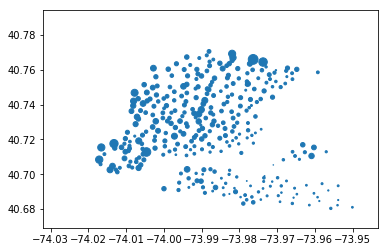

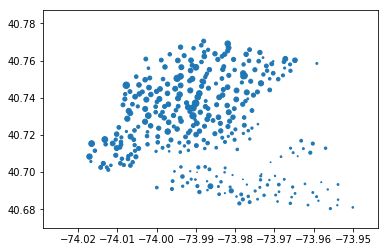

D:\Anaconda3\lib\site-packages\matplotlib\collections.py:877: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


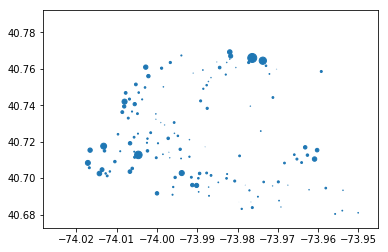

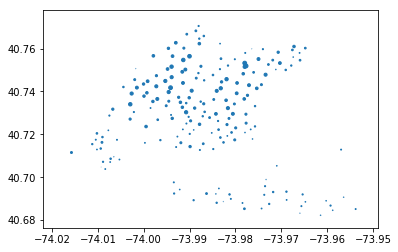

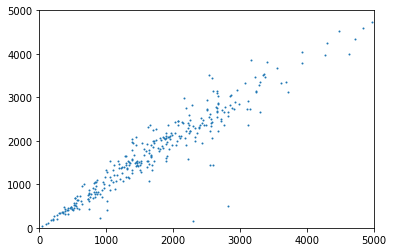

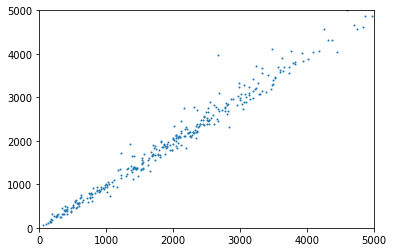

,inflow_cus,inflow_sub,outflow_cus,outflow_sub,latitude,longitude,size_cus,size_sub,flow_dif,flow_dif2
72,736,2772,787,2788,40.767272,-73.993929,20.1036,18.9040,1.1996,-1.1996
79,1470,3661,1334,3700,40.719116,-74.006667,37.0128,25.0274,11.9854,-11.9854
82,337,749,346,795,40.711174,-74.000165,9.0156,5.2496,3.7660,-3.7660
83,497,1392,464,1125,40.683826,-73.976323,12.6852,8.5578,4.1274,-4.1274
116,414,2974,495,3026,40.741776,-74.001497,11.9988,20.4000,-8.4012,8.4012
119,27,100,24,93,40.696089,-73.978034,0.6732,0.6562,0.0170,-0.0170
120,111,598,79,572,40.686768,-73.959282,2.5080,3.9780,-1.4700,1.4700
127,684,3560,800,3688,40.731724,-74.006744,19.5888,24.6432,-5.0544,5.0544
128,833,3937,810,3828,40.727103,-74.002971,21.6876,26.4010,-4.7134,4.7134
137,234,478,199,448,40.761628,-73.972924,5.7156,3.1484,2.5672,-2.5672


In [15]:
grouped = trip.groupby('start station id')
outflow_cus = trip['start station id'][(trip['usertype'] == 'Customer')].value_counts().sort_index()
inflo_cus = trip['end station id'][(trip['usertype'] == 'Customer')].value_counts().sort_index()
outflow_sub = trip['start station id'][(trip['usertype'] == 'Subscriber')].value_counts().sort_index()
inflow_sub = trip['end station id'][(trip['usertype'] == 'Subscriber')].value_counts().sort_index()
d_sum = {'outflow_cus':list(outflow_cus),'inflow_cus':list(inflo_cus),'outflow_sub':list(outflow_sub),'inflow_sub':list(inflow_sub)}
flow_sum = pd.DataFrame(data = d_sum , index = list(outflow_cus.index.values))

flow_sum['latitude']= list(grouped['start station latitude'].mean())
flow_sum['longitude']= list(grouped['start station longitude'].mean())
flow_sum['size_cus'] = (flow_sum['inflow_cus'] + flow_sum['outflow_cus'])/500*6.6 #activity indicator of 'Customer' user group
flow_sum['size_sub'] = (flow_sum['inflow_sub'] + flow_sum['outflow_sub'])/500*1.7 #activity indicator of 'Subscriber' user group
flow_sum['flow_dif'] = flow_sum['size_cus'] - flow_sum['size_sub'] 
flow_sum['flow_dif2'] = flow_sum['size_sub'] - flow_sum['size_cus'] 

x = flow_sum['longitude']
y = flow_sum['latitude']
x1 = flow_sum['inflow_cus'] * 6.6 / 1.7
y1 = flow_sum['outflow_cus'] * 6.6 / 1.7
x2 = flow_sum['inflow_sub']
y2 = flow_sum['outflow_sub']
x3 = (flow_sum['inflow_cus'] + flow_sum['outflow_cus']) * 6.6 / 1.7
y3 = (flow_sum['inflow_sub'] + flow_sum['outflow_sub'])
s_cus = flow_sum['size_cus']
s_sub = flow_sum['size_sub']
s_dif = flow_sum['flow_dif']
s_dif2 = flow_sum['flow_dif2']

flow_sum

#---------------1st plot-------------

#Total activity of 'Customer' user group (Normalized according to group size)
plt.scatter(x,y,s=s_cus)
plt.show()
#Total activity of 'Subscriber' user group
plt.scatter(x,y,s=s_sub)
plt.show()

#Stations that are more 'Customer' active
plt.scatter(x,y,s=s_dif)
plt.show()

#Stations that are more 'Subscriber' active
plt.scatter(x,y,s=s_dif2)
plt.show()



In [ ]:
#---------------2nd plot-------------

#Bike in-flow and out-flow pattern of 'Customer' user group
plt.scatter(x1,y1,s=1)
plt.axis([0,5000,0,5000])
plt.show()

#Bike in-flow and out-flow pattern of 'Customer' user group
plt.scatter(x2,y2,s=1)
plt.axis([0,5000,0,5000])
plt.show()


flow_sum